# Comparison to DNAm Age

Comparison of effective rates of aging and age acceleration measurements between our physiological age and the DNA methylation age from (Horvath, 2013). DNAm ages were calculated for the inCHIANTI cohort for the 1998 and 2007 waves of the study (i.e. W0 and W3). The physiological ages were calculated using the random forest model on all available inchianti features.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import csv
import math

In [11]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]

# DNAm data
DNAm_data = np.genfromtxt('InCHIANTI_DNAmAge.csv',delimiter=',')
m_id = DNAm_data[1:,0]
m_age = DNAm_data[1:,2]
m_year = DNAm_data[1:,1]
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 1998 or m_year[i]==98:
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 2007:
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)

In [12]:
# Calculate eRAs and PAAs for DNAm
rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_accel = []

for key, value in rate_dict.items():
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))

In [13]:
# Calculate averages for the physiological rates
rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

## Comparison of eRA

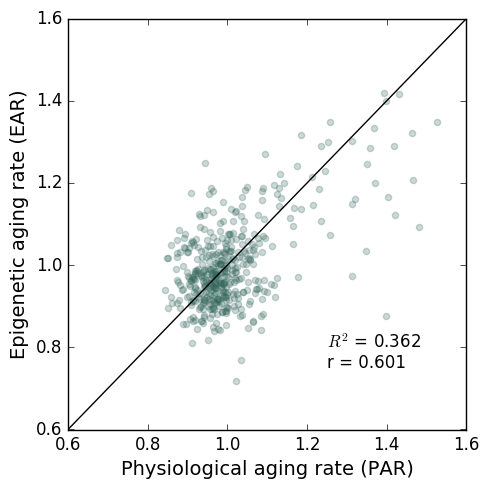

In [6]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.6,1.6],[0.6,1.6],'k')
pl.xlim(0.6,1.6)
pl.ylim(0.6,1.6)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate.png', dpi=800)
pl.show()

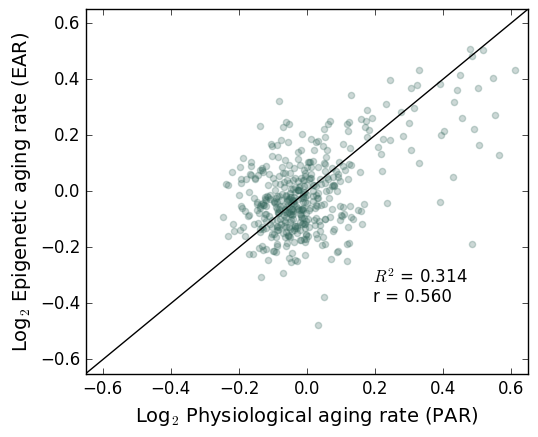

In [7]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(np.log2(m_eRA), np.log2(phys_eRA))
pl.figure(figsize=(5.5,4.5))
pl.scatter(np.log2(phys_eRA),np.log2(m_eRA),color='#34675C',alpha=0.25)
pl.ylabel('Log$_{2}$ Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Log$_{2}$ Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-0.65,0.65],[-0.65,0.65],'k')
pl.xlim(-0.65,0.65)
pl.ylim(-0.65,0.65)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_log.png', dpi=800)
pl.show()

## Comparison of age acceleration

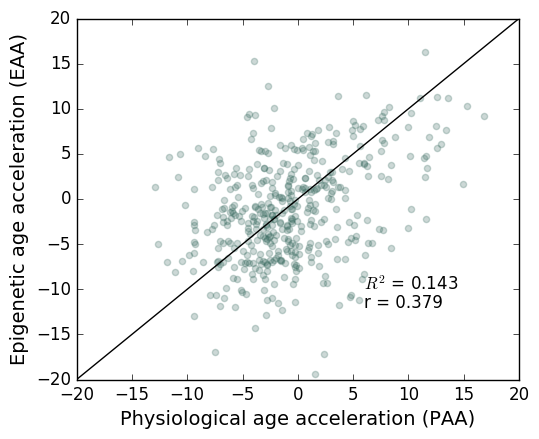

In [14]:
m_PAA = []
phys_PAA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_PAA.append(phys_accel[phys_idx])
        m_PAA.append(m_accel[idx])

pearson, p = pearsonr(m_PAA, phys_PAA)
pl.figure(figsize=(5.5,4.5))
pl.scatter(phys_PAA, m_PAA, color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic age acceleration (EAA)', fontsize=14)
pl.xlabel('Physiological age acceleration (PAA)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-20,20],[-20,20],'k')
pl.xlim(-20,20)
pl.ylim(-20,20)
pl.tight_layout()
pl.savefig('./Figures/DNAm_accel.png', dpi=800)
pl.show()

# Elastic Net Model (inCHIANTI)

In [15]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_en/wave0_inchianti_en.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_en/wave3_inchianti_en.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]

# DNAm data
DNAm_data = np.genfromtxt('InCHIANTI_DNAmAge.csv',delimiter=',')
m_id = DNAm_data[1:,0]
m_age = DNAm_data[1:,2]
m_year = DNAm_data[1:,1]
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 1998:
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 2007:
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)

# Calculate eRAs and PAAs for DNAm
rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_accel = []

for key, value in rate_dict.items():
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))

In [16]:
# Calculate averages for the physiological rates
rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

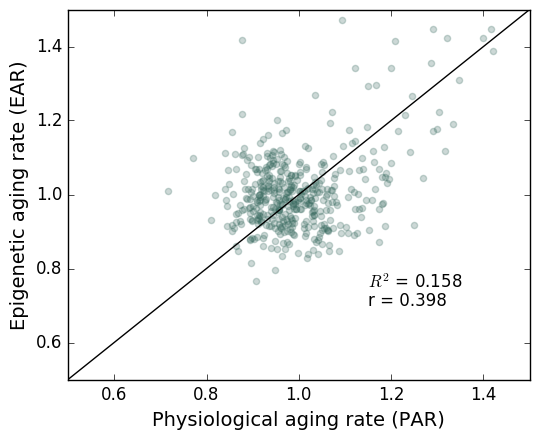

In [17]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5.5,4.5))
pl.scatter(m_eRA, phys_eRA,color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.5,1.5],[0.5,1.5],'k')
pl.xlim(0.5,1.5)
pl.ylim(0.5,1.5)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_en.png', dpi=800)
pl.show()

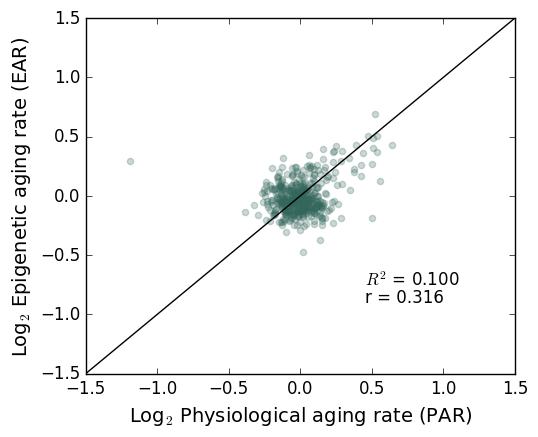

In [20]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(np.log2(m_eRA), np.log2(phys_eRA))
pl.figure(figsize=(5.5,4.5))
pl.scatter(np.log2(phys_eRA),np.log2(m_eRA),color='#34675C',alpha=0.25)
pl.ylabel('Log$_{2}$ Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Log$_{2}$ Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-1.5,1.5],[-1.5,1.5],'k')
pl.xlim(-1.5,1.5)
pl.ylim(-1.5,1.5)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_en_log.png', dpi=800)
pl.show()

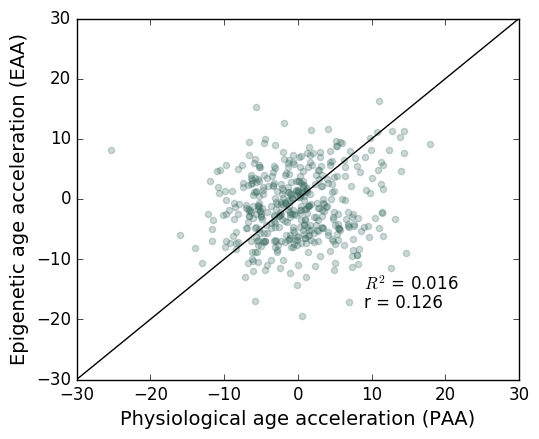

In [24]:
m_PAA = []
phys_PAA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_PAA.append(phys_accel[phys_idx])
        m_PAA.append(m_accel[idx])

pearson, p = pearsonr(m_PAA, phys_PAA)
pl.figure(figsize=(5.5,4.5))
pl.scatter(phys_PAA, m_PAA, color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic age acceleration (EAA)', fontsize=14)
pl.xlabel('Physiological age acceleration (PAA)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-30,30],[-30,30],'k')
pl.xlim(-30,30)
pl.ylim(-30,30)
pl.tight_layout()
pl.savefig('./Figures/DNAm_accel_en.png', dpi=800)
pl.show()